<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Recomendaci%C3%B3n_de_libros_usando_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [59]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [60]:
# Procesamiento y Visualizacion de Datos
import pandas as pd
import numpy as np
from collections import Counter # para contar frecuencias
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocesar texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud

# Modelado de tópicos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
stopwords_nltk = stopwords.words('spanish')
print(stopwords_nltk, len(stopwords_nltk))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [62]:
stopwords = pd.read_csv('https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt', header=None)
stopwords_list = stopwords[0].tolist()
print(stopwords_list, len(stopwords_list))

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

<h2>  Funciones

In [63]:
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [64]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*') #stopwords.words('spanish')
  texto = stop.sub('', texto) 

  #Quitar puntuación y números
  texto = re.sub('[^ña-záéíóúü]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  # st = PorterStemmer()
  lemma = WordNetLemmatizer()
  texto = texto.split()
  texto = ' '.join([lemma.lemmatize(i) for i in texto if len(i)>2])
  
  return(texto)

# Lectura y exploración de datos

In [65]:
import glob

speech_list = glob.glob('C:\\Users\\conte\\OneDrive\\Escritorio\\Discursos\\MM\\*.txt')

df_af = pd.DataFrame(columns=['speech','date','speech_length'], index=[i for i in range(len(speech_list))])

for key, speech in enumerate(speech_list):
    with open(speech, 'r', encoding='utf-8') as file:
        df_af['speech'][key] = file.read()
    df_af['date'][key] = speech[51:53] + '/' + speech[54:56] + '/' + speech[57:61]
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSOS)','')
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSO)','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE MACRI.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('MACRI.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PERIODISTA.-','')
    df_af['speech_length'][key] = len(df_af['speech'][key].split())

In [66]:
# Dtypes assignment
df_af['speech'] = df_af['speech'].astype(str)
df_af['date'] = df_af['date'].astype('M')
df_af['speech_length'] = df_af['speech_length'].astype(int)

#Sorting by date
df_af = df_af.sort_values('date')

df_af

,speech,date,speech_length
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067
...,...,...,...
595,"Buenas tardes a todos, miembros de la Unión In...",2019-11-29,1118
612,"Gracias, Pedro. Es un honor ser parte de esta ...",2019-12-02,456
611,Buenas tardes a todos: estamos muy contentos d...,2019-12-02,198
617,"Bom dia, hasta ahí llegó el portugués.\n\nPero...",2019-12-05,1214


In [67]:
speechs = ' '.join(df_af['speech'][i]for i in range(len(df_af)))

print(f'Total words in speechs: {len(speechs.split())}')
words_speechs = Counter(speechs.split())
words_speechs.most_common(10)

Total words in speechs: 713679


[('que', 43635),
 ('de', 32005),
 ('la', 20501),
 ('y', 19750),
 ('a', 19740),
 ('en', 17356),
 ('el', 15323),
 ('los', 10471),
 ('es', 10065),
 ('para', 7841)]

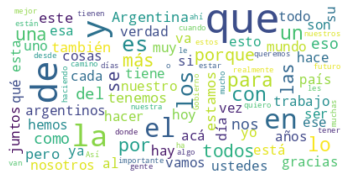

In [68]:
nube_palabras(df_af['speech'])

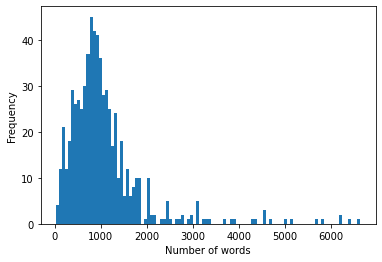

In [69]:
df_af['speech_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [70]:
df_af['speech_length'].describe()

count     663.000000
mean     1076.438914
std       867.706617
min        29.000000
25%       599.000000
50%       899.000000
75%      1263.000000
max      6645.000000
Name: speech_length, dtype: float64

# Obtener los tópicos principales

## Vectorización de textos

In [71]:
df_af['summary'] = df_af['speech'].apply(preprocesar)

df_af['summary_length'] = df_af['summary'].str.split().str.len()

df_af.head()

,speech,date,speech_length,summary,summary_length
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29,gracias acompañarnos espero dije frente plaza ...,12
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803,señores jefes representantes delegaciones extr...,1070
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323,gracias gracias difícil transmitirles siente a...,119
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207,agradezco señor intendente exaltación señores ...,75
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067,tardes enorme alegría salón lleno marca espera...,729


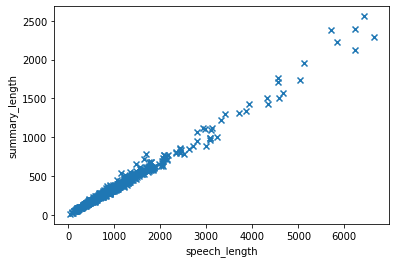

In [72]:
plt.scatter(df_af['speech_length'], df_af['summary_length'], marker='x')
plt.xlabel('speech_length')
plt.ylabel('summary_length')
plt.show()

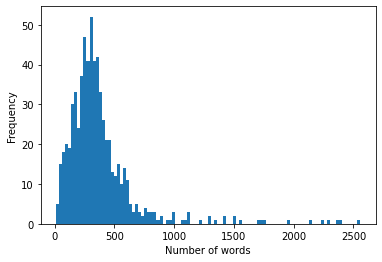

In [73]:
df_af['summary_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [74]:
df_af['summary_length'].describe()

count     663.000000
mean      377.612368
std       312.455216
min        12.000000
25%       217.000000
50%       315.000000
75%       435.000000
max      2558.000000
Name: summary_length, dtype: float64

In [75]:
summaries = ' '.join(df_af['summary'][i]for i in range(len(df_af)))

print(f'Total words in summaries: {len(summaries.split())}')
words_summaries = Counter(summaries.split())
words_summaries.most_common(10)

Total words in summaries: 250357


[('argentina', 2998),
 ('argentinos', 2538),
 ('país', 2405),
 ('años', 2277),
 ('mundo', 1931),
 ('acá', 1859),
 ('gracias', 1818),
 ('ustedes', 1775),
 ('día', 1325),
 ('junto', 1273)]

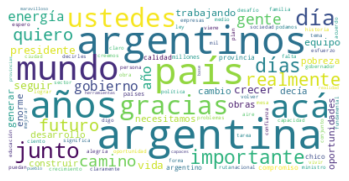

In [76]:
nube_palabras(df_af['summary'])

In [77]:
vectorizer = CountVectorizer(min_df = 10, max_df = 0.2, ngram_range=(1,3))
BOW = vectorizer.fit_transform(df_af['summary'])
BOW.shape

(663, 4243)

In [78]:
vocabulario = vectorizer.get_feature_names_out()
len(vocabulario)

4243

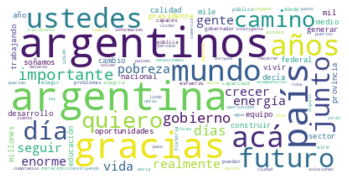

In [79]:
nube_palabras(vocabulario)

## Entrenamiento del modelo

El número óptimo de topicos depende de las caracteristicas del texto a analizar (el largo de los textos, la cantidad de distintas ideas)

No obstante existen algunas metricas que ayudan a determinar k.

In [93]:
k = 4

In [94]:
lda_model = LatentDirichletAllocation(n_components=k, learning_method='online', max_iter=1000, random_state=42) 

In [95]:
%%time
lda_model.fit(BOW) # entrena el modelo y obtienela matriz documento-topico

CPU times: total: 1min 15s
Wall time: 3min 11s


LatentDirichletAllocation(learning_method='online', max_iter=1000,
                          n_components=4, random_state=42)

### Distribución de temas en cada noticia  ($\theta$)

In [96]:
doc_top = pd.DataFrame(lda_model.transform(BOW))
print(doc_top.shape)
doc_top.head()

(663, 4)


,0,1,2,3
0,0.019538,0.019386,0.940873,0.020203
1,0.000431,0.128791,0.325268,0.545509
2,0.003658,0.003676,0.764640,0.228027
3,0.006957,0.240703,0.745146,0.007194
4,0.030096,0.657443,0.229315,0.083146


In [97]:
doc_top.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
658    1.0
659    1.0
660    1.0
661    1.0
662    1.0
Length: 663, dtype: float64

In [98]:
df_lda = pd.merge(df_af, doc_top, left_index=True, right_index=True)
df_lda.head()

,speech,date,speech_length,summary,summary_length,0,1,2,3
622,Gracias a todos por acompañarnos y espero – co...,2015-12-10,29,gracias acompañarnos espero dije frente plaza ...,12,0.008204,0.137579,0.845669,0.008547
623,Señores Jefes de Estado; representantes de del...,2015-12-10,2803,señores jefes representantes delegaciones extr...,1070,0.001035,0.787906,0.058183,0.152876
624,"Gracias, muchas gracias: es difícil transmitir...",2015-12-10,323,gracias gracias difícil transmitirles siente a...,119,0.002481,0.290685,0.704264,0.002570
626,"Agradezco al señor intendente de Exaltación, a...",2015-12-11,207,agradezco señor intendente exaltación señores ...,75,0.001130,0.612082,0.385654,0.001134
636,"Buenas tardes a todos, es una enorme alegría q...",2015-12-14,2067,tardes enorme alegría salón lleno marca espera...,729,0.503811,0.318151,0.177313,0.000725


### Distribución de palabras en cada tema ($\mu$)

In [99]:
μs = pd.DataFrame(lda_model.exp_dirichlet_component_,
                         columns=vocabulario)
print(μs.shape)
μs

(4, 4243)


,abajo,abandonado,abandonar,abandono,abastecer,abierta,abierto,abiertos,abrazo,abre,...,ética,éxito,éxitos,íbamos,única,única comercio,única comercio exterior,único camino,único equipo,únicos
0,0.000001,1.351705e-06,0.000001,0.000001,2.002688e-04,1.168437e-06,1.687911e-06,1.361363e-06,1.295818e-06,0.000366,...,0.000001,1.862979e-03,1.087196e-04,1.401223e-06,0.000001,1.079254e-06,1.079254e-06,2.924938e-04,1.455892e-06,8.481395e-04
1,0.000157,3.845745e-04,0.000234,0.000425,4.514160e-04,6.426638e-05,1.479465e-03,2.071366e-04,3.154384e-07,0.000434,...,0.000053,1.486584e-03,3.223566e-07,5.044144e-04,0.001918,4.417851e-04,4.417851e-04,1.563571e-04,1.971480e-04,3.073740e-07
2,0.000025,1.237056e-04,0.000270,0.000935,3.065496e-07,3.501272e-07,3.503648e-07,4.304262e-07,2.249996e-04,0.000261,...,0.000027,3.663348e-07,4.213243e-07,7.739686e-04,0.000580,3.108112e-07,3.108112e-07,4.238347e-07,4.339240e-07,5.567729e-06
3,0.000132,4.963344e-07,0.000259,0.000064,8.572959e-07,2.394533e-04,7.255071e-04,1.182440e-04,8.971925e-07,0.000152,...,0.000207,9.868277e-04,3.658296e-04,5.790478e-07,0.000678,5.023195e-07,5.023195e-07,4.790141e-04,4.972814e-07,1.107464e-04



Palabras más frecuentes del topico 0
['turismo', 'climático', 'cambio climático', 'renovables', 'jujuy', 'energías', 'visita', 'parque', 'jujeños', 'gerardo']


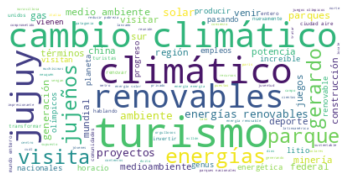


Palabras más frecuentes del topico 1
['inflación', 'exportar', 'impuestos', 'pymes', 'economía', 'información', 'campo', 'trámites', 'logramos', 'dólares']


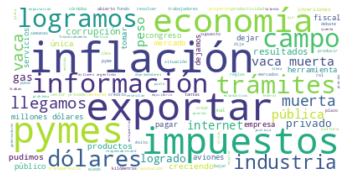


Palabras más frecuentes del topico 2
['maría', 'vos', 'eugenia', 'maría eugenia', 'elegir', 'feliz', 'gobernadora', 'agua', 'amor', 'intendente']


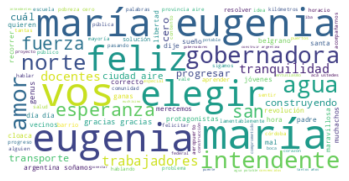


Palabras más frecuentes del topico 3
['integración', 'mercosur', 'fuerzas', 'desafíos', 'región', 'paz', 'democracia', 'valores', 'agenda', 'relación']


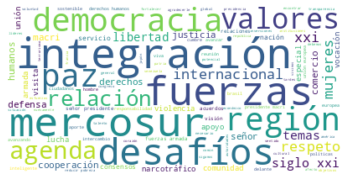

In [100]:
for top in range(k):
  print(f'\nPalabras más frecuentes del topico {top}')
  words = list(μs.T[top].sort_values(ascending=False).head(10).index)
  freq = μs.T[top].sort_values(ascending=False).head(100)
  print(words)
  wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate_from_frequencies(freq)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

### Visualización del modelo

In [101]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, BOW, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.050725 -0.201608       1        1  37.738031
1      0.071859  0.020304       2        1  33.645424
3      0.170827  0.063722       3        1  19.250607
0     -0.191961  0.117581       4        1   9.365938, topic_info=             Term        Freq       Total Category  logprob  loglift
4005      turismo  167.000000  167.000000  Default  30.0000  30.0000
2209  integración  162.000000  162.000000  Default  29.0000  29.0000
3492   renovables  125.000000  125.000000  Default  28.0000  28.0000
2586     mercosur  184.000000  184.000000  Default  27.0000  27.0000
4143       visita  152.000000  152.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1856          gas   39.525431  151.912884   Topic4  -5.8694   1.0217
3832          sur   35.574226   84.704953   Topic4  -5.9748   1.5005
4085        venir   37.833102  174.746353   Topic4  -5.9132   0.8379
3474       región   38.177316  204.748345   Topic4  -5.9041   0.6886
1721      federal   35.219544  190.297486   Topic4  -5.9848   0.6811

[289 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
90        1  0.976767  acá ustedes
90        3  0.013200  acá ustedes
110       2  0.985570         afip
114       1  0.172823       agenda
114       2  0.072474       agenda
...     ...       ...          ...
4223      2  0.046048          ypf
4223      4  0.920966          ypf
4237      1  0.219460        única
4237      2  0.645081        única
4237      3  0.133006        única

[498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

### Guardamos modelo

In [102]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# tuple_models = (lda_model, BOW, vectorizer)
# pickle.dump(tuple_models, open (path + "tuple_model_books_k10.pkl", 'wb'))

In [103]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# lda_model, BOW, vectorizer = pickle.load(open(path + "tuple_model_books_k10.pkl", 'rb'))


## Sistema de recomendación usando similitud coseno

In [104]:
# def similitud_coseno(a_vector, b_vector):
#     '''Calcula la similitud coseno entre los vectores a y b'''

#     numerador = np.dot(a_vector, b_vector)
    
#     a_norm = np.sqrt(np.sum(a_vector**2))  
#     b_norm = np.sqrt(np.sum(b_vector**2))
    
#     denominador = a_norm * b_norm
    
#     similitud_coseno = numerador / denominador 
    
#     return similitud_coseno

In [105]:
# def documentos_similares(titulo):
#   inx = df_af[titulo in df_af['Title']].index[0]
#   q_k = doc_top.loc[inx].values
#   n = doc_top.shape[0]
#   similaridad = {}
#   relevantes={}
  
#   # Calcular similitud coseno
#   for doc_inx in range(n):
#       if doc_inx == inx:
#           continue
#       similaridad[doc_inx] = similitud_coseno(q_k, doc_top.loc[doc_inx].values)

#   rank = {k:v for k,v in sorted(similaridad.items(), key=lambda x: x[1], 
#                                 reverse=True)}
#   top10 = pd.DataFrame.from_dict(rank, orient = 'index', columns=['sim_cos']).head()
#   recomendaciones = pd.merge(df.iloc[:,0:3], top10, how='right',  right_index=True, left_index=True)        
#   recomendaciones.index = np.arange(1, 6)
  return recomendaciones

IndentationError: unexpected indent (1234969060.py, line 19)